# Assignment 1

In [1]:
name = 'Yana Charuyskaya'
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [2]:
def order_pizza(pizza_type, size='medium', *extra_toppings, delivery_method='delivery', **additional_info):
    """
    A function to place a pizza order.

    Parameters
    ----------
    pizza_type : str
        The type of pizza you want to order (e.g., "Margherita", "Pepperoni").
    size : str, optional
        The size of the pizza. Defaults to "medium" (can be "small", "medium", or "large").
    *extra_toppings : tuple
        Any number of additional toppings (for example, "cheese", "mushrooms", "olives").
    delivery_method : str, optional
        How you want to receive the pizza. Defaults to "delivery" (can be "restaurant" or "delivery").
    **additional_info : dict
        Any other extra information about the order in key=value format
        (for example, delivery time `time="20:00"` or a discount coupon `coupon="NEWYEAR2025"`).

    Returns
    -------
    dict
        A dictionary with all the order information.
    """

    return {
        'pizza_type': pizza_type,
        'size': size,
        'extra_toppings': extra_toppings,
        'delivery_method': delivery_method,
        'additional_info': additional_info
    }

## Exercise 1


In [3]:
import math

def is_prime(n):
    """
    Check if the number is prime or not.
    """
    if n <= 1:
        return False
    elif n <= 3:
        return True
    # If n is divisible by 2 or 3, it's not prime
    elif n % 2 == 0 or n % 3 == 0:
        return False

    for i in range(5, int(math.ceil(math.sqrt(n)))):
      if n % i == 0:
        return False

    return True

is_prime(517)

False

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [4]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in)
    and print the following data:
    the name of the analyzed function,
    the name of all the arguments it takes
    and their types (positional, keyword, etc.)
    """
    print("Function name:", func.__name__)

    sig = inspect.signature(func)

    for name, param in sig.parameters.items():
        print("Argument name:", name)
        print("Argument kind:", param.kind)

        if param.default is not inspect._empty:
            print("Default value:", param.default)

        print()

inspect_function(order_pizza)


Function name: order_pizza
Argument name: pizza_type
Argument kind: POSITIONAL_OR_KEYWORD

Argument name: size
Argument kind: POSITIONAL_OR_KEYWORD
Default value: medium

Argument name: extra_toppings
Argument kind: VAR_POSITIONAL

Argument name: delivery_method
Argument kind: KEYWORD_ONLY
Default value: delivery

Argument name: additional_info
Argument kind: VAR_KEYWORD



## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message.

In [5]:
from datetime import datetime
from time import sleep

# wrong function
def my_time_now(msg):
    current_time = datetime.now()
    print(msg, current_time)

In [6]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2024-12-25 09:57:24.488083
The time is now:  2024-12-25 09:57:25.490232
The time is now:  2024-12-25 09:57:26.492930


## Exercise 4

In [7]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    # your code here
    count = 0
    for value in input_generator:
        if count < max_count:
            yield value
            count += 1
        else:
            break

## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task)

In [8]:
def pascal_triangle():
    """
    Generator that yields the infinite sequence of numbers in Pascal's triangle.
    """
    row = [1]
    while True:
        for val in row:
            yield val
        row = [1] + [row[i] + row[i+1] for i in range(len(row)-1)] + [1]

In [9]:
for val in limit(pascal_triangle(), 100):
  print(val, end=" ")

1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 1 10 45 120 210 252 210 120 45 10 1 1 11 55 165 330 462 462 330 165 55 11 1 1 12 66 220 495 792 924 792 495 220 66 12 1 1 13 78 286 715 1287 1716 1716 1287 

## Exercise 6


In [10]:
import os

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically
    """

    files_with_sizes = []

    for item in os.listdir(path_to_dir):

        full_path = os.path.join(path_to_dir, item)

        if os.path.isfile(full_path):

            size = os.path.getsize(full_path)
            files_with_sizes.append((item, size))


    files_with_sizes.sort(key=lambda file_info: (file_info[1], file_info[0]))
    sorted_files = [file_info[0] for file_info in files_with_sizes]

    return sorted_files

## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [11]:
import heapq

def merge_sorter(*args):

    all_sequences = []

    for seq in args:

        all_sequences.append(seq)

    merged = heapq.merge(*all_sequences)

    for value in merged:
        yield value


In [12]:
merge_sorter (1, 6, 234)

<generator object merge_sorter at 0x7989fd93c890>

## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [13]:
def profiler():
    # your code here
    raise NotImplementedError

def ackermann(n, m):
    # your code here
    raise NotImplementedError

In [14]:
import time
from functools import wraps
import sys
sys.setrecursionlimit(10**6)

def profiler():
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            wrapper.calls = 0

            start = time.time()
            result = count_calls(func, *args, **kwargs)
            end = time.time()

            wrapper.last_time_taken = end - start

            return result

        def count_calls(f, *a, **kw):

            wrapper.calls += 1
            return f(*a, **kw)

        wrapper.last_time_taken = 0
        wrapper.calls = 0

        return wrapper

    return decorator

@profiler()
def ackermann(m, n):
    if m == 0:
        return n + 1
    elif n == 0:
        return ackermann(m - 1, 1)
    else:
        return ackermann(m - 1, ackermann(m, n - 1))

In [15]:
result = ackermann(3, 6)
print("Result:", result)
print("Calls:", ackermann.calls)
print("Time taken:", ackermann.last_time_taken, "seconds")

Result: 509
Calls: 1
Time taken: 0.7690050601959229 seconds


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [16]:
def encode(sequence):
    # your code here
    raise NotImplementedError

In [17]:
def encode(sequence):
    if not sequence:
        return []

    current_char = sequence[0]
    count = 1
    result = []

    for char in sequence[1:]:

        if char == current_char:
            count += 1

        else:
            result.append((current_char, count))
            current_char = char
            count = 1

    result.append((current_char, count))

    return result

In [38]:
encode(['a', 'b', 'b', 'b', 'c', 1, 3, 'a', 'a'])

[('a', 1), ('b', 3), ('c', 1), (1, 1), (3, 1), ('a', 2)]

## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

fibonacci(5) = 5


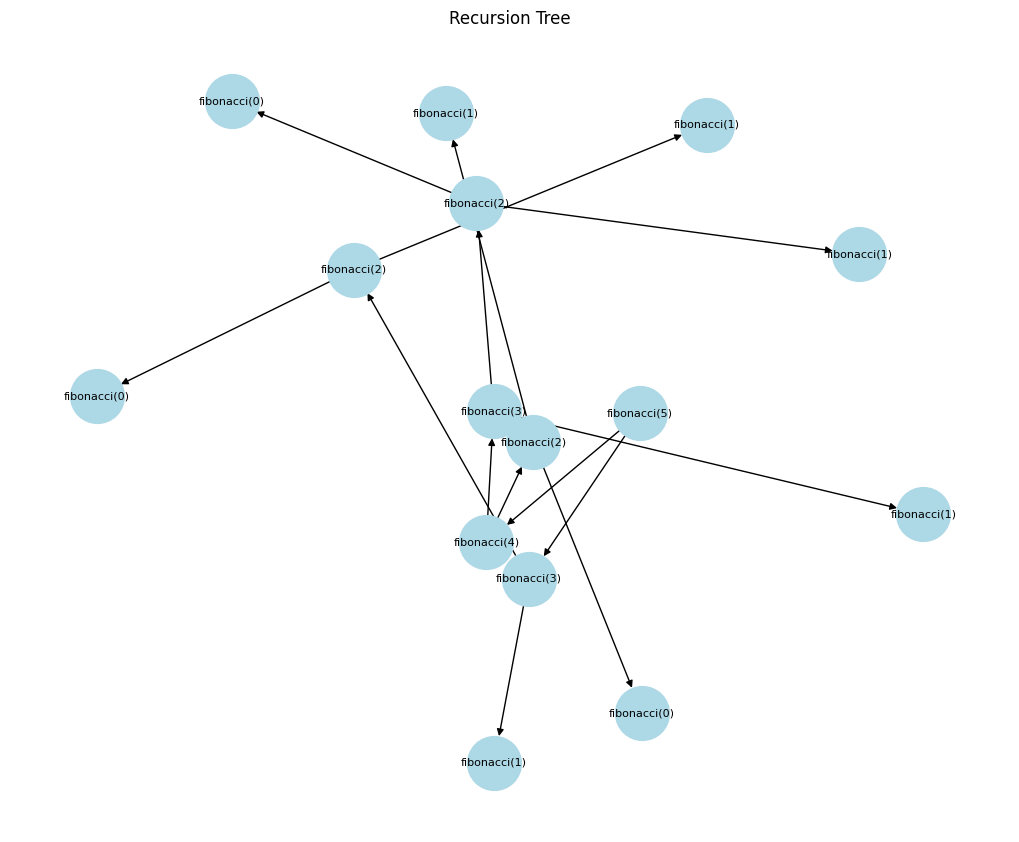

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import functools

def visualizer(func):
    """
    A decorator that tracks and visualizes the recursion tree of the decorated function.
    """
    recursion_graph = nx.DiGraph()
    call_id_counter = [0]
    call_stack = []

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        current_call_id = call_id_counter[0]
        call_id_counter[0] += 1

        if call_stack:
            parent_call_id = call_stack[-1]
            recursion_graph.add_edge(parent_call_id, current_call_id)

        call_stack.append(current_call_id)

        func_name = func.__name__
        args_list = ", ".join(map(str, args))
        node_label = f"{func_name}({args_list})"
        recursion_graph.add_node(current_call_id, label=node_label)

        result = func(*args, **kwargs)

        call_stack.pop()

        return result

    def draw_graph():
        """
        Draws the recursion tree using matplotlib + networkx.
        """
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(recursion_graph, k=1.0, seed=42)
        nx.draw(
            recursion_graph,
            pos,
            with_labels=False,
            arrows=True,
            node_color="lightblue",
            node_size=1500,
        )

        labels = {
            node_id: recursion_graph.nodes[node_id]["label"]
            for node_id in recursion_graph.nodes
        }
        nx.draw_networkx_labels(recursion_graph, pos, labels=labels, font_size=8)

        plt.title("Recursion Tree")
        plt.axis("off")
        plt.show()

    wrapper.draw_graph = draw_graph

    return wrapper


@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)


value = fibonacci(5)
print("fibonacci(5) =", value)


fibonacci.draw_graph()


## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization).
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [38]:
import functools

def memoizer(func):
    cache = {}

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if args not in cache:
            cache[args] = func(*args, **kwargs)
        return cache[args]

    return wrapper


In [39]:
import time
import functools

def profiler(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"[profiler] {func.__name__}{args} took {end - start:.5f} s")
        return result

    return wrapper


In [43]:
import networkx as nx
import matplotlib.pyplot as plt
import functools

def visualizer(func):
    """
    A decorator that tracks and visualizes the recursion tree of the decorated function.
    """
    recursion_graph = nx.DiGraph()
    call_id_counter = [0]
    call_stack = []

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        current_call_id = call_id_counter[0]
        call_id_counter[0] += 1

        if call_stack:
            parent_call_id = call_stack[-1]
            recursion_graph.add_edge(parent_call_id, current_call_id)

        call_stack.append(current_call_id)

        func_name = func.__name__
        args_list = ", ".join(map(str, args))
        node_label = f"{func_name}({args_list})"
        recursion_graph.add_node(current_call_id, label=node_label)

        result = func(*args, **kwargs)

        call_stack.pop()

        return result

    def draw_graph():
        """
        Draws the recursion tree using matplotlib + networkx.
        """
        plt.figure(figsize=(10, 8))
        pos = nx.spring_layout(recursion_graph, k=1.0, seed=42)
        nx.draw(
            recursion_graph,
            pos,
            with_labels=False,
            arrows=True,
            node_color="lightblue",
            node_size=1500,
        )

        labels = {
            node_id: recursion_graph.nodes[node_id]["label"]
            for node_id in recursion_graph.nodes
        }
        nx.draw_networkx_labels(recursion_graph, pos, labels=labels, font_size=8)

        plt.title("Recursion Tree")
        plt.axis("off")
        plt.show()

    wrapper.draw_graph = draw_graph

    return wrapper


[profiler] fibonacci(1,) took 0.00001 s
[profiler] fibonacci(0,) took 0.00003 s
[profiler] fibonacci(2,) took 0.00253 s
[profiler] fibonacci(3,) took 0.00302 s
[profiler] fibonacci(4,) took 0.00356 s
[profiler] fibonacci(5,) took 0.00401 s
fibonacci(5) = 5


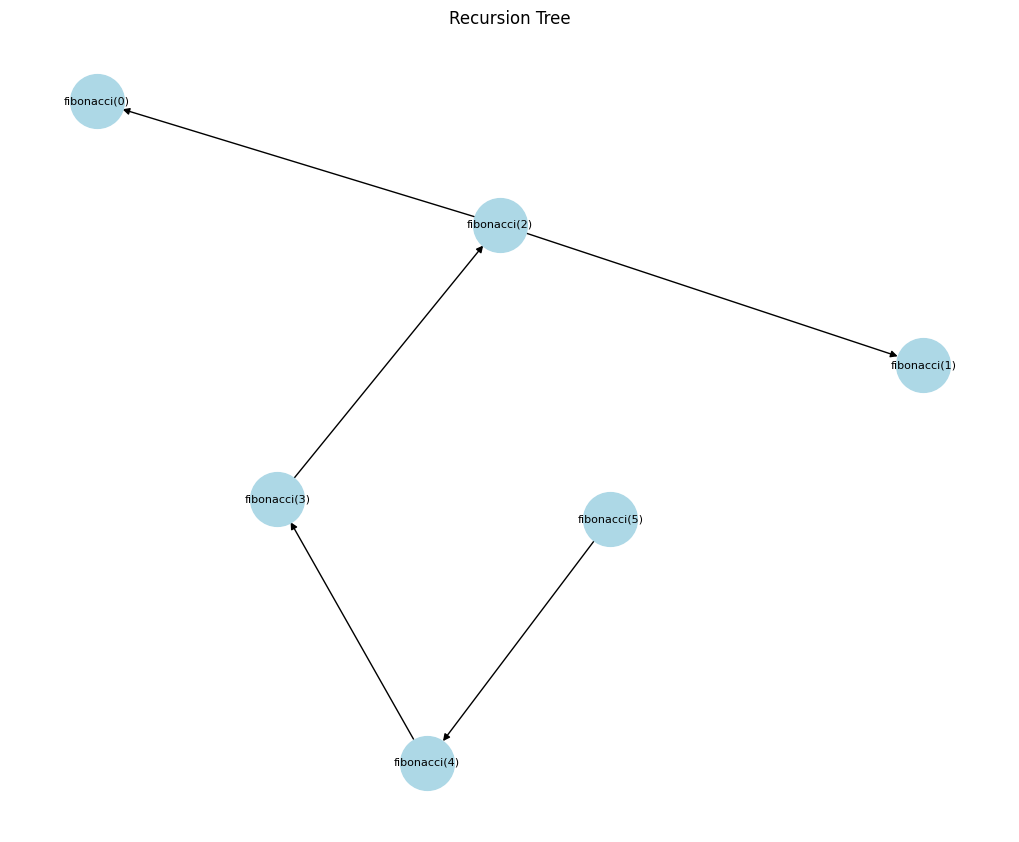

In [44]:
@memoizer
@profiler
@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)


value = fibonacci(5)
print("fibonacci(5) =", value)


fibonacci.draw_graph()

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [23]:
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

In [27]:
bool_matrix = [
    [isinstance(obj, typ) for typ in list_of_types]
    for obj in list_of_objects
]

In [28]:
import numpy as np

int_matrix = np.array(bool_matrix, dtype=int)

In [29]:
print(int_matrix)

[[0 0 1 0 0 0]
 [1 0 1 0 0 0]
 [0 1 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 1 0 0]
 [0 1 1 0 0 0]
 [0 0 1 1 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 1]
 [0 0 1 0 1 0]]


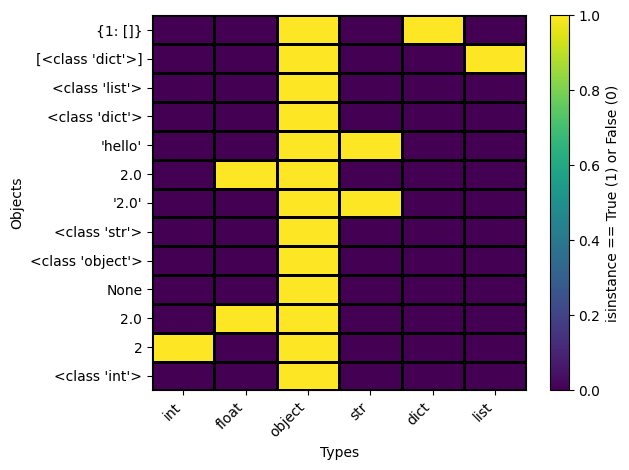

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

c = ax.pcolormesh(int_matrix, cmap='viridis', edgecolors='black', shading='auto')

ax.set_xlabel('Types')
ax.set_ylabel('Objects')

ax.set_xticks(np.arange(len(list_of_types)) + 0.5)
ax.set_yticks(np.arange(len(list_of_objects)) + 0.5)

ax.set_xticklabels([t.__name__ for t in list_of_types], rotation=45, ha='right')
ax.set_yticklabels([repr(obj) for obj in list_of_objects])

fig.colorbar(c, ax=ax, label='isinstance == True (1) or False (0)')

plt.tight_layout()
plt.show()
